<a href="https://colab.research.google.com/github/Beatrix-droid/pytorch-tutorial/blob/master/pytorch_tutorial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Learning Pytorch
```
# This is formatted as code
```



creating a tensor

In [2]:
#creating a tensor:
import torch

x = torch.empty(2,2) # a 2d tensor
print(x)

tensor([[9.9295e-36, 0.0000e+00],
        [1.5975e-43, 1.3873e-43]])


can sue teh rand ne==method to create a tensor with random numbers

In [3]:
#can create tensors from lists as well:
torch.tensor([[1., -1.], [1., -1.]])

tensor([[ 1., -1.],
        [ 1., -1.]])

In [ ]:
#can add tensors as you would normal add ints or concat strings

#can also add one tensor to another:
x = torch.rand(2,2)
y = torch.rand(2,2)
y.add_(x) #add tensor x to y. By defualt any function with a trailing underscore in pytorch will be an inplace operation


#can also divide and multiplu as one normally woukld

converting a tensor to a numpy array

In [6]:
import numpy as np

a=torch.ones(5) #a 1d tensor of len 5 full of ones
b = a.numpy() #conver to array
print(a)
print(type(b))
print(b)

tensor([1., 1., 1., 1., 1.])
<class 'numpy.ndarray'>
[1. 1. 1. 1. 1.]


converting an array to a tensor

In [7]:
a= np.ones(5) #instantiate the array
b=torch.from_numpy(a) #convert the arary to a pytorch tensor
print(b)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


check if you have a cuda toolkit avaialble to do operations on the gpu

In [ ]:
if torch.cuda.is_available():
  device = torch.device('cuda')
  x= torch.ones(5, device=device)
  y=torch.ones(5)
  y=y.to(device) #create and move tensors to gpu
#if you now try to use numpy n calling  
  x.numpy()
  #you will get an error because numpy can only handle 
  #cpu tensors so we would have to move it back to the cpu
  x=x.to('cpu')
  

grad = true
when creatinga  tensor in pytorch we can set an optional parameter to True: requires_grad=True  This tells pytorch that it will have to calculate teh gradient of the tensor later on in the computation

In [8]:
x = torch.ones(5, requires_grad=True)

# Autograd Pytorch
calculate gradients to optimize models

In [10]:
x = torch.rand(3)
print(x)

tensor([0.0306, 0.8308, 0.6019])


In [11]:
#say we need ot calculate the gradient of a functionat that point.
#we set requires_grad=True:
x = torch.rand(3, requires_grad=True)



In [20]:
#now do an operation:
y = x+2
print(y) #operation was addition so the grad_funct was add
z = y*y*2
print(z)#operation was mult so the grad_funct was mult
z=z.mean()

tensor([2.8129, 2.2352, 2.7104], grad_fn=<AddBackward0>)
tensor([15.8252,  9.9925, 14.6929], grad_fn=<MulBackward0>)


now when we want to calculate the gradients the only thing that we need to do is call the .backward() method:

In [21]:
z.backward()# will calculate the gradient of z with respect to x so dz/dx

In [22]:
#now x has a grad attribute with teh gradients stored that we can use:

print(x.grad)

tensor([7.5012, 5.9606, 7.2278])


In this case z was a scalar (as z =z.mean()) so we could just implciitly call the backward function on it.

the backward function is based on the chain rule  (jacobain matrix)(vector) = (gradients we are interested in
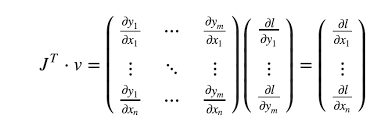


in general if z is a vector you need to pass the value f the vector in the function.Say we had something like:
```
v= torch.tensor([0.1. 1.0, 0.001],dtype=torch.float32)
z = y*y*2 #z is now a bector
z.backward(v)
# This is formatted as code
```



#preventing Pytorch from tracking the history
 (useful when updating weights of a model)

 We have three options on how to do this:
 
 ```
 1) x.requres_grad_(False)
 2) x.detach()
 3) with torch.no_grad():
 ```

In [23]:
#method 1
x.requires_grad_(False)

tensor([0.8129, 0.2352, 0.7104])

In [24]:
#method 2
y = x.detach() #creates a new tensor with teh same values but no gradient
print(y)

tensor([0.8129, 0.2352, 0.7104])


In [25]:
#method 3
with torch.no_grad():
  y = x+2
print(y)

tensor([2.8129, 2.2352, 2.7104])


warning, whenever we call the backward  function then the gradient for the tensors will be accumulated and summed up in the .grad attribute:

In [28]:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)

tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])


In [29]:
#for the second one the gradients are incorrect. they have neen usmmed up hence 6

#must clear the weights each time:
weights = torch.ones(4, requires_grad=True)
for epoch in range(2):
  model_output= (weights*3).sum()
  model_output.backward()

  print(weights.grad)
  weights.grad.zero_()#this is the important line

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
